# Algoritmia
## Práctica 7
En esta práctica se resolverá el problema de las Torres de Hanoi, con dos añadidos: el número de postes puede ser mayor que 3, los discos pueden estar en cualquiera de los postes.

En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.

Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

## Preámbulo
No se puede importar de otros módulos, salvo que se consulte previamente con el profesor. 

In [1]:
# Importaciones
import unittest
import matplotlib.pyplot as plt

# "Magics":
%matplotlib inline

## Torres de Hanoi
### Clase `Hanoi`

In [2]:
class Hanoi:
    """Clase para representar las torres de Hanoi."""

    def __init__(self, discos, num_postes=None):
        """
        El parámetro discos es un entero o una secuencia.
        Si es un entero se refiere al número de discos en el primer poste.
        Si es una secuencia, cada elemento indica en qué poste está el disco.
        Los postes se identifican como 1, 2, 3...
        El primer elemento de la secuencia se refiere al disco más pequeño,
        el último al más grande.
        El parámetro num_postes es el número de postes.
        Si num_postes es None, será el máximo de 3 y el mayor valor que aparezca
        en discos
        """

        if isinstance(discos, int):
            discos = [1] * discos # todos los discos en el poste 1
        else:
            discos = list(discos)    
        self._discos = discos
        
        if num_postes is None:
            num_postes = max(3, max(discos))
        
        self._num_postes = num_postes

        # Almacenamos los postes como una lista de listas
        self._postes = [[] for _ in range(num_postes)]
        i = len(discos)
        for d in discos[::-1]:
            self._postes[d - 1].append(i)
            i -= 1

    def __len__(self):
        """Devuelve el número de discos"""
        
        return len(self._discos)

    def mueve(self, origen, destino):
        """Mueve el disco superior del poste origen al poste destino."""
        
        assert 1 <= origen <= self._num_postes
        assert 1 <= destino <= self._num_postes

        poste_origen = self._postes[origen - 1]
        poste_destino = self._postes[destino - 1]
               
        assert len(poste_origen) > 0 # hay discos en el poste origen
        disco = poste_origen[-1]

        # comprobamos si podemos mover el disco:
        assert (len(poste_destino) == 0 # el destino está vacío
                or disco < poste_destino[-1]) # contiene un disco mayor

        # movemos:
        self._discos[disco - 1] = destino
        poste_origen.pop()
        poste_destino.append(disco)
    
    def __str__(self):
        return str(self._discos)
    
    def realiza_movimientos(self, movimientos, imprime=False, dibuja=False):
        """
        Realiza varios movimientos, cada movimiento se indica como un par
        (origen, destino).
        """
        
        if imprime:
            self.imprime()
        if dibuja:
            self.dibuja()
        for origen, destino in movimientos:
            self.mueve(origen, destino)
            if imprime:
                print("\n", origen, "->", destino, sep="")
                self.imprime()
            if dibuja:
                self.dibuja()

    def imprime(self):        
        """Imprime una representación gráfica de las torres"""

        n = len(self)
        for nivel in range(len(self) - 1, -1, -1):
            for poste in self._postes:
                if nivel >= len(poste):
                    print("|", " " * (n - 1), sep="", end=" ")
                else:
                    disco = poste[nivel]
                    print("X" * disco, " " * (n - disco), sep="", end=" ")
            print()
        for _ in self._postes:
            print("=" * n, sep=" ", end=" ")
        print()
        
    def dibuja(self):
        """Dibuja una representación gráfica de las torres"""
        
        f, axs = plt.subplots(1, self._num_postes, sharex=False, sharey=True, 
                              figsize=(self._num_postes, 1))
        n = len(self)
        for a, p in zip(axs, self._postes):
            a.set_aspect(1)
            a.axis('off')
            p = p + [0] * (n - len(p))
            left = [(n - x) / 2 for x in p]
            a.barh(range(n), p, height=1, left=left)
        plt.tight_layout()
        plt.show()

    def resuelve(self, destino=None):
        """
        Resuelve el problema, moviendo todos los discos al poste destino,
        partiendo de cualquier configuración inicial.
        Si el argumento destino es None, el poste destino es el último.
        Devuelve una secuencia con los movimientos, cada movimiento es un par
        (origen, destino).
        Si hay más de 3 postes, el resto también se deberían utilizar en algunos 
        casos.
        """
        
        pass

### Impresión de las torres

In [3]:
for h in (
    Hanoi(3), Hanoi(4), Hanoi(3, 5), Hanoi([1, 2, 3]),  Hanoi([1, 2, 3] * 2), 
    Hanoi([1, 4, 2, 3], 4), Hanoi([1, 10] * 3, 10)
):
    h.imprime()
    
h = Hanoi(3)    
h.realiza_movimientos(((1, 2), (1, 3), (2, 3)), imprime=True)

X   |   |   
XX  |   |   
XXX |   |   
=== === === 
X    |    |    
XX   |    |    
XXX  |    |    
XXXX |    |    
==== ==== ==== 
X   |   |   |   |   
XX  |   |   |   |   
XXX |   |   |   |   
=== === === === === 
|   |   |   
|   |   |   
X   XX  XXX 
=== === === 
|      |      |      
|      |      |      
|      |      |      
|      |      |      
X      XX     XXX    
XXXX   XXXXX  XXXXXX 
====== ====== ====== 
|    |    |    |    
|    |    |    |    
|    |    |    |    
X    XXX  XXXX XX   
==== ==== ==== ==== 
|      |      |      |      |      |      |      |      |      |      
|      |      |      |      |      |      |      |      |      |      
|      |      |      |      |      |      |      |      |      |      
X      |      |      |      |      |      |      |      |      XX     
XXX    |      |      |      |      |      |      |      |      XXXX   
XXXXX  |      |      |      |      |      |      |      |      XXXXXX 
====== ====== ====== ====== ====== ====== =====

### Dibujo de las torres

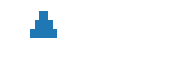

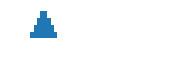

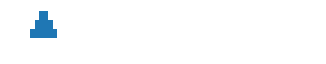

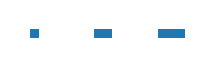

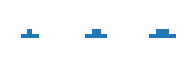

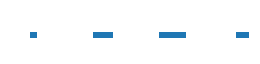

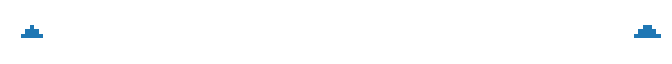

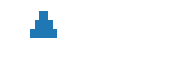

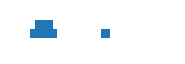

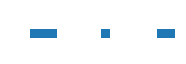

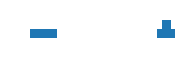

In [4]:
for h in (
    Hanoi(3), Hanoi(4), Hanoi(3, 5), Hanoi([1, 2, 3]),  Hanoi([1, 2, 3] * 2), 
    Hanoi([1, 4, 2, 3], 4), Hanoi([1, 10] * 3, 10)
):
    h.dibuja()
    
h = Hanoi(3)    
h.realiza_movimientos(((1, 2), (1, 3), (2, 3)), dibuja=True)    

## Tests para Hanoi

In [5]:
class TestHanoi(unittest.TestCase):
    
    @staticmethod
    def postes_usados(movimientos):
        """
        Devuelve el número de postes usados en una secuencia de movimientos.
        """
        return len(set((y for x in movimientos for y in x)))
    
    def test_3_3_3(self):
        # 3 discos en el poste 1, mover al poste 3
        h = Hanoi(3)
        movimientos = h.resuelve()
        self.assertEqual(str(h), "[3, 3, 3]")
        h = Hanoi(3)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), "[3, 3, 3]")
        
    def test_7_3_2(self):
        # 7 discos en el poste 1, mover al poste 2
        h = Hanoi(7)
        movimientos = h.resuelve(2)
        self.assertEqual(str(h), str([2] * 7))
        h = Hanoi(7)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([2] * 7))
        
    def test_3_4_4(self):
        # 3 discos en el poste 1, 4 postes
        h = Hanoi(3, 4)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([4] * 3))
        h = Hanoi(3, 4)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([4] * 3))    
        self.assertEqual(self.postes_usados(movimientos), 4)
 
    def test_10_5_5(self):
        # 10 discos en el poste 1, 5 postes
        h = Hanoi(10, 5)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([5] * 10))
        h = Hanoi(10, 5)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([5] * 10))  
        self.assertEqual(self.postes_usados(movimientos), 5)
        
    def test_132_3_3(self):
        # 3 discos repartidos en los 3 postes
        discos = [1, 3, 2]
        h = Hanoi(discos)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([3] * 3))
        h = Hanoi(discos)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([3] * 3))     

    def test_233122_3_3(self):
        # 6 discos repartidos en los 3 postes
        discos = [2, 3, 3, 1, 1, 2]
        h = Hanoi(discos)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([3] * 6))
        h = Hanoi(discos)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([3] * 6)) 

    def test_233112312_3_3(self):
        # 9 discos repartidos en los 3 postes
        discos = [2, 3, 3, 1, 1, 2, 3, 1, 2]
        h = Hanoi(discos)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([3] * 9))
        h = Hanoi(discos)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([3] * 9))
        
    def test_3341344221_4_4(self):
        # 10 discos repartidos en 4 postes
        discos = [3, 3, 4, 1, 3, 4, 4, 2, 2, 1]
        h = Hanoi(discos)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([4] * 10))
        h = Hanoi(discos)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([4] * 10))
        self.assertEqual(self.postes_usados(movimientos), 4)
        
    def test_3341344221_6_6(self):
        # 10 discos repartidos en los primeros 4 postes de 6
        discos = [3, 3, 4, 1, 3, 4, 4, 2, 2, 1]
        h = Hanoi(discos, 6)
        movimientos = h.resuelve()
        self.assertEqual(str(h), str([6] * 10))
        h = Hanoi(discos, 6)
        h.realiza_movimientos(movimientos)
        self.assertEqual(str(h), str([6] * 10))
        self.assertEqual(self.postes_usados(movimientos), 6)        

## Ejecución de tests

In [6]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

FFFFFFFFF
FAIL: test_10_5_5 (__main__.TestHanoi)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-5-5fadd5a5498b>", line 42, in test_10_5_5
    self.assertEqual(str(h), str([5] * 10))
AssertionError: '[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]' != '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'
- [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
+ [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


FAIL: test_132_3_3 (__main__.TestHanoi)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-5-5fadd5a5498b>", line 53, in test_132_3_3
    self.assertEqual(str(h), str([3] * 3))
AssertionError: '[1, 3, 2]' != '[3, 3, 3]'
- [1, 3, 2]
+ [3, 3, 3]


FAIL: test_233112312_3_3 (__main__.TestHanoi)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-5-5fadd5a5498b>", line 73, in test_233112312_3_3
    self.assertEqual(str(h), str([3